<h1>CNN Using Raw Spectra as Inputs</h1>

<p>This notebook is used to train and explore a CNN model that classifies minerals by taking in raw spectra</p>

In [1]:
import numpy as np
import pandas as pd
import utils.cnnmodel_raw as cnn_raw
from tensorflow.keras.models import Model


<h1>Use this space below for fiddling with model training</h1>

<p>If you need to retrain the model, be sure to restart the runtime</p>

<h3>Define Hyperparameters below</h3>

In [2]:
learning_rate=0.001
batch_size=500
drop_rate=0.55
epochs=5

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]

In [3]:
#this string is prepended to all output files for unique identification
id_value='v1_test_23_08_22'

#training data file path
fin_path=r'Data/Raw Data/Single/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
#note if fast is true, model will train in <5 min while false may be >30 min
fast=True

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0.5


In [4]:
# initialize model class
raw_model = cnn_raw.cnn_model('cnn_raw')

In [5]:
'''train the model'''
train_history=raw_model.raw_cnn_model(fin_path,mout_path,dev_size,r_state,hyperparameters,
                          fast,threshold=threshold,fil_id=id_value)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 950, 1)]          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 930, 16)           352       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 930, 16)           64        
_________________________________________________________________
relu1 (LeakyReLU)            (None, 930, 16)           0         
_________________________________________________________________
mpool1 (MaxPooling1D)        (None, 465, 16)           0         
_________________________________________________________________
conv2 (Conv1D)               (None, 455, 32)           5664      
_________________________________________________________________
bn2 (BatchNormalization)     (None, 455, 32)          

d:\base\Spec-CNN-refactor\env_scnn23\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=range(0, 16) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15
true_0,1957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_1,0,1388,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_2,0,0,1004,0,0,0,0,0,0,1,0,0,0,0,0,0
true_3,0,0,0,1619,0,0,0,0,0,0,0,0,0,0,0,0
true_4,0,0,0,0,1223,0,0,0,0,0,0,0,0,0,0,0
true_5,0,0,0,1,0,1238,0,0,0,0,0,0,0,0,0,0
true_6,0,0,0,0,0,0,1292,0,0,0,0,0,0,0,0,0
true_7,0,0,0,0,0,0,0,1123,0,0,0,0,0,0,0,0
true_8,0,0,0,0,0,0,0,0,1102,0,0,0,0,0,0,0
true_9,0,0,0,0,0,0,0,0,0,1110,0,0,0,0,0,1


TypeError: cannot unpack non-iterable History object

<h2><b>Test the model</b></h2>

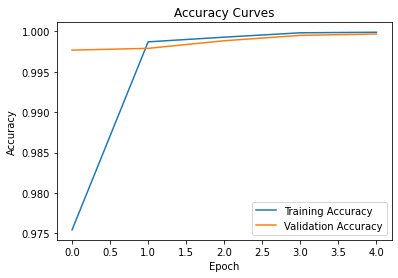

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pprint import pprint
from IPython.display import clear_output
from sklearn.metrics import roc_curve

train_accuracy = train_history.history['sparse_categorical_accuracy']
train_accuracy_df = pd.DataFrame(train_accuracy)
#train_accuracy_df.to_csv(train_accuracy_path, index = False, header = False)

val_accuracy = train_history.history['val_sparse_categorical_accuracy']
val_accuracy_df = pd.DataFrame(val_accuracy)
#val_accuracy_df.to_csv(val_accuracy_path, index = False, header = False)


plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

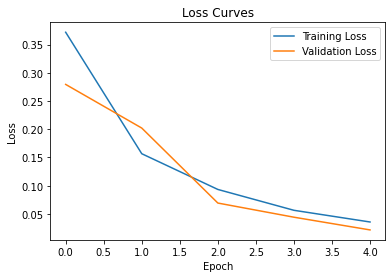

In [6]:
train_loss = train_history.history['loss']
train_loss_df = pd.DataFrame(train_loss)
#train_loss_df.to_csv(train_loss_path, index = False, header = False)

val_loss = train_history.history['val_loss']
val_loss_df = pd.DataFrame(val_loss)
#val_loss_df.to_csv(val_loss_path, index = False, header = False)

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [7]:
def plot_confusion_matrix(y_true, y_pred, title, path):
    import matplotlib.pyplot as plt  
    labels = np.arange(15)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, columns = labels, index = labels)
    #cm_df.to_csv(path, index = True, header = True)
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'Actual'
    fig, ax = plt.subplots(figsize=(13,10))         # Sample figsize in inches
    sn.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'd', cbar = False)
    plt.title(title)
    plt.show()


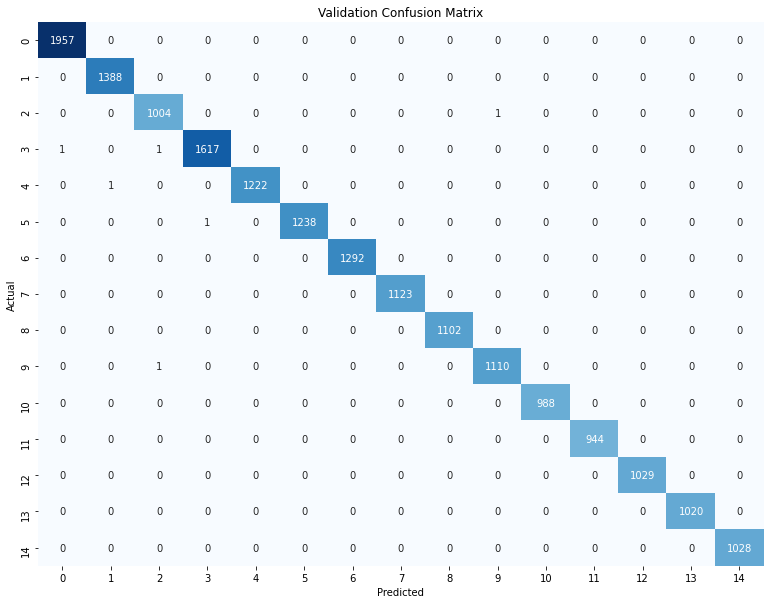

In [8]:
val_cm_path=r'Model Data/CNN Model/Raw/val_confusion_matrix_'+id_value+r'.csv'
plot_confusion_matrix(y_val, np.argmax(cnn_model.predict(X_val), axis = 1), 'Validation Confusion Matrix', val_cm_path)

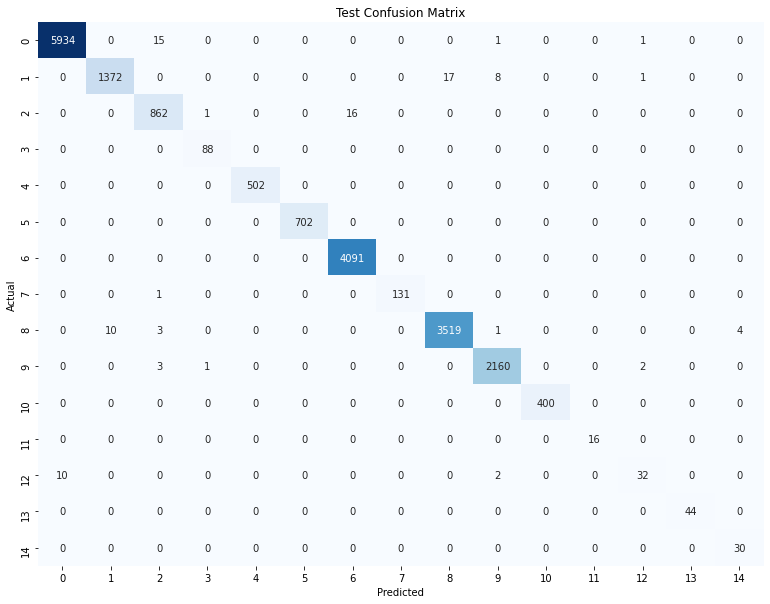

[[0.00077595 0.0009817  0.00088211 ... 0.00065382 0.00094903 0.00073333]
 [0.00319391 0.00196501 0.00074879 ... 0.00126538 0.00237994 0.00167333]
 [0.00076245 0.0010074  0.00075562 ... 0.00062544 0.00086066 0.00051679]
 ...
 [0.00375737 0.00214887 0.00151716 ... 0.00094424 0.00110238 0.00113446]
 [0.00244112 0.00166202 0.00111715 ... 0.00084941 0.00105111 0.00110533]
 [0.00302352 0.00195671 0.00126372 ... 0.00102445 0.00104464 0.00131585]]


In [9]:
testin_path=r'Data/Raw Data/Mixed/Test Set/'
test_cm_path=r'Model Data/CNN Model/Raw/test_confusion_matrix_'+id_value+r'.csv'

import helper as h
#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,split_df=False,dev_size=0.2,r_state=1,raw=True)


#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values


plot_confusion_matrix(y_test, np.argmax(cnn_model.predict(X_test), axis = 1), 'Test Confusion Matrix', test_cm_path) 
print(cnn_model.predict(X_test))

In [10]:
print(classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1)))

cr = classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1), output_dict = True)
cr_df = pd.DataFrame(cr).transpose()
#cr_df.to_csv(cr_path, index = True, header = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5951
           1       0.99      0.98      0.99      1398
           2       0.98      0.98      0.98       879
           3       0.98      1.00      0.99        88
           4       1.00      1.00      1.00       502
           5       1.00      1.00      1.00       702
           6       1.00      1.00      1.00      4091
           7       1.00      0.99      1.00       132
           8       1.00      0.99      1.00      3537
           9       0.99      1.00      1.00      2166
          10       1.00      1.00      1.00       400
          11       1.00      1.00      1.00        16
          12       0.89      0.73      0.80        44
          13       1.00      1.00      1.00        44
          14       0.88      1.00      0.94        30

    accuracy                           1.00     19980
   macro avg       0.98      0.98      0.98     19980
weighted avg       1.00   

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


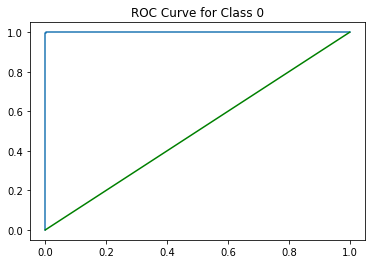

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


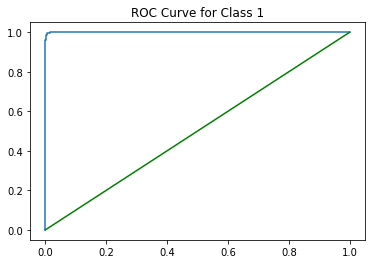

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


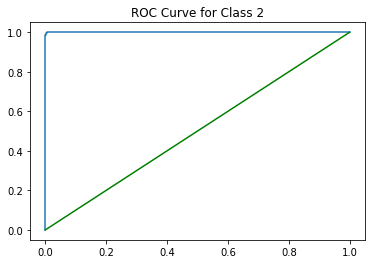

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


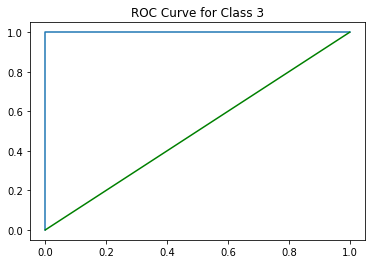

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


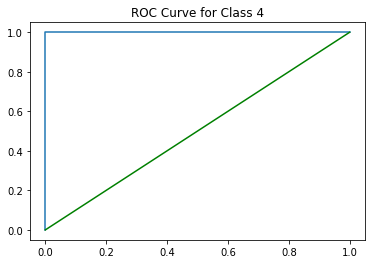

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


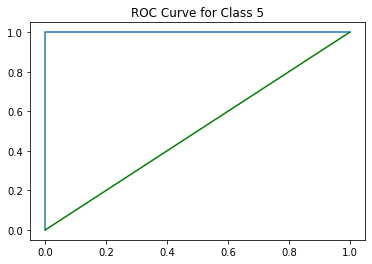

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


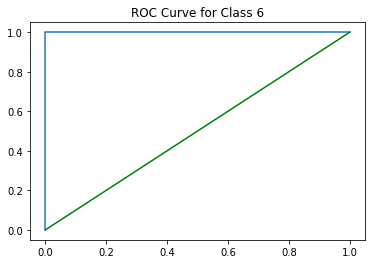

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


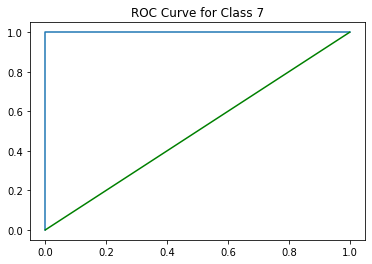

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


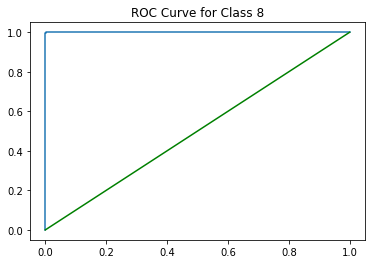

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


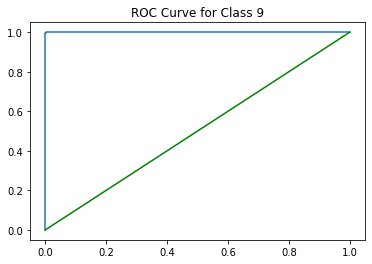

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


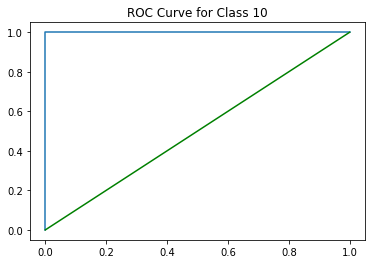

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


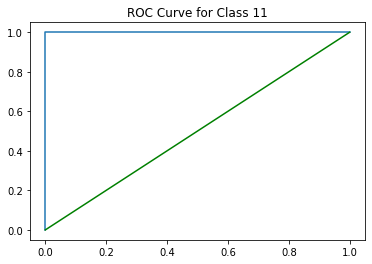

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


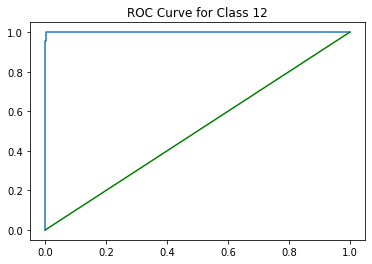

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


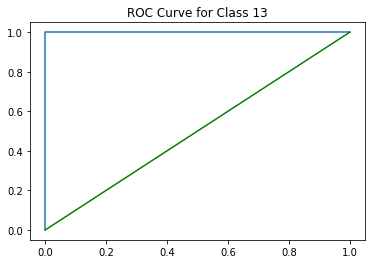

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


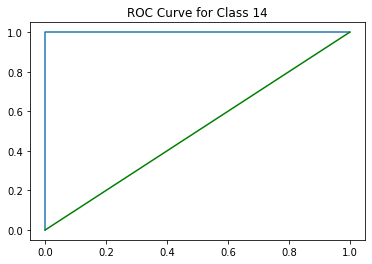

In [11]:
roc_out=h.roc_all(cnn_model.predict(X_test),y_test)
roc_out.to_csv(mout_path+id_value+'roc_data.csv')